<font size="+3"><strong>Predicting Price with Size</strong></font>

In [ ]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

warnings.simplefilter(action="ignore", category=FutureWarning)

# Prepare Data

## Import

In [ ]:
# Create a DataFrame df from the CSV file
def wrangle(filepath):
    #import_csv
    df = pd.read_csv(filepath,index_col=[0])

    return df

In [ ]:
df = wrangle("colombia-real-estate.csv")
print("df shape:", df.shape)
df.head()

df shape: (6804, 16)


operation property_type        place_with_parent_names  \
0      sell         store           |Colombia|Antioquia|   
1      sell         store           |Colombia|Antioquia|   
2      sell         house  |Colombia|Antioquia|Rionegro|   
3      sell         house  |Colombia|Antioquia|Rionegro|   
4      sell         house           |Colombia|Antioquia|   

                   lat-lon         price currency  price_aprox_local_currency  \
0  6.12182271,-75.42727947  1.700000e+08      COP                1.713305e+08   
1  6.11051488,-75.45238495  1.600000e+09      COP                1.612523e+09   
2  6.15028325,-75.37891388  9.500000e+08      COP                9.574354e+08   
3      6.140373,-75.412345  4.000000e+08      COP                4.031307e+08   
4      6.057394,-75.502792  8.500000e+08      COP                8.566528e+08   

   price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0         57401.01                  NaN                   25.0   
1        540244.86               2600.0                 1100.0   
2        320770.38               1000.0                  290.0   
3        135061.21                 92.0                  150.0   
4        287005.08                359.0                  250.0   

   price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
0               NaN  6.800000e+06    NaN    NaN       NaN   
1        207.786485  1.454545e+06    NaN    NaN       NaN   
2        320.770380  3.275862e+06    NaN    3.0       NaN   
3       1468.056630  2.666667e+06    NaN    3.0       NaN   
4        799.457047  3.400000e+06    NaN    6.0       NaN   

                                       properati_url  
0  http://antioquia-colombia.properati.com.co/jjh...  
1  http://antioquia-colombia.properati.com.co/jji...  
2  http://rionegro-antioquia.properati.com.co/jjk...  
3  http://rionegro-antioquia.properati.com.co/jjm...  
4  http://antioquia-colombia.properati.com.co/jjp...

In [ ]:
# Subset the dataset houses in Bogotá proper `Bogotá D.C` that cost less than $400,000
# Subset to propertes in '"Bogotá D.C"'
mask_ba= df["place_with_parent_names"].str.contains("Bogotá D.C")

# Subset for  '"house"'
mask_apt=df["property_type"] == "house"

# Subset where '"price_aprox_usd"' < 400,000
mask_price= df["price_aprox_usd"] < 400_000

df= df[mask_ba & mask_apt & mask_price]

## 1.2. Explore

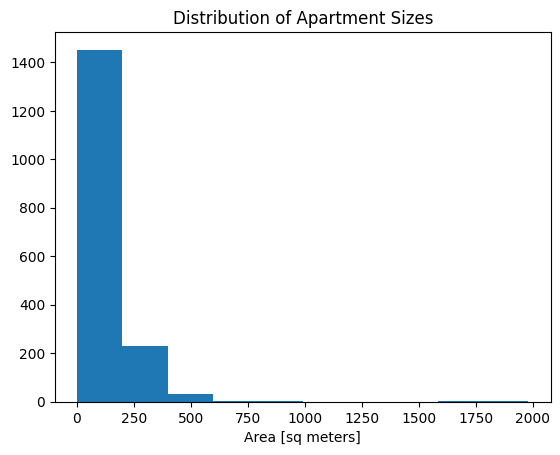

In [ ]:
# The distribution of apartment sizes
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

In [ ]:
# The summary statistics for the `surface_covered_in_m2`
df.describe()["surface_covered_in_m2"]

count    1718.000000
mean      140.550640
std       104.223398
min         3.000000
25%        80.000000
50%       116.000000
75%       170.000000
max      1980.000000
Name: surface_covered_in_m2, dtype: float64

In [ ]:
#Remove the outliers by '"surface_covered_in_m2"'
low, high= df["surface_covered_in_m2"].quantile([0.1,0.9])
mask_area =df["surface_covered_in_m2"].between(low, high)
df=df[mask_area]

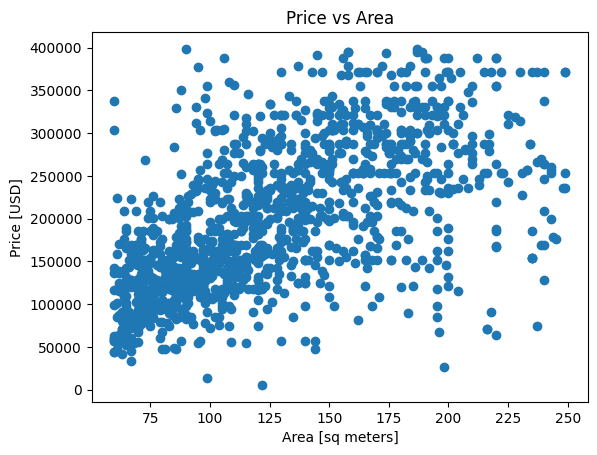

In [ ]:
# Exploring the relationship between apartment size and price
plt.scatter(x= df["surface_covered_in_m2"], y= df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");

## 1.3 Split

A key part in any model-building project is separating y
our **target** (the thing we want to predict)
from our **features** (the information our model will use to make its predictions). Since this is our
first model, we’ll use just one feature: apartment size.

In [ ]:
# Create feature matrix named X_train
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1377, 1)

In [ ]:
# Create the target vector
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1377,)

# 2 Build Model

## 2.1 Baseline

In [ ]:
# Calculate the mean of the target vector
y_mean = y_train.mean()
y_mean

195596.97349310093

In [ ]:
# Generate a list that repeats the prediction for every observation in our dataset
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[195596.97349310093,
 195596.97349310093,
 195596.97349310093,
 195596.97349310093,
 195596.97349310093]

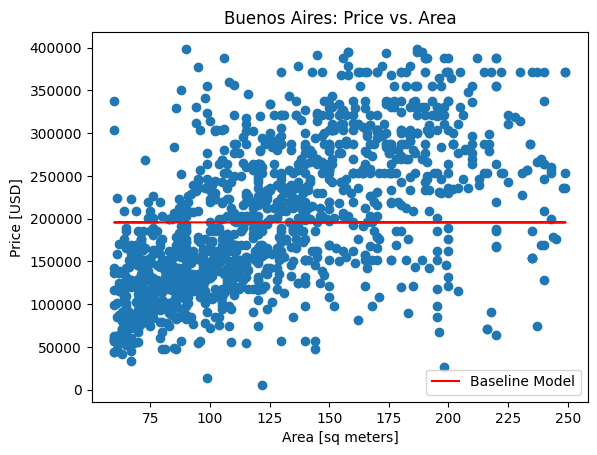

In [ ]:
# plotting the baseline model
plt.plot(X_train, y_pred_baseline, color="red", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

In [ ]:
# Calculate the baseline mean absolute error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 195596.97
Baseline MAE: 72274.36


## 2.2 Iterate

In [ ]:
# Instantiate a `LinearRegression` model
model = LinearRegression()

The second thing we need to do is use our data to train our model. Another way to say this is fit
our model to the training data.

In [ ]:
# Fit the model
model.fit(X_train, y_train)

LinearRegression()

## 2.3 Evaluate

In [ ]:
# Create a list of predictions
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([207060.82585798, 326831.11953354, 205920.1563944 , 216186.18156659,
       335956.47524216])

In [ ]:
# Calculate the training mean absolute error
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 52093.88


In [ ]:
# Calculate the testing mean absolute error
df_test = wrangle("colombia-real-estate-test.csv")
X_test = df_test[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    224170.867812
1    452304.760527
2    216186.181567
3    347363.169878
4    152308.691606
dtype: float64

# 3 Communicate Results

In [ ]:
# Extract the intercept from the model
intercept = round(model.intercept_, 2)
print("Model Intercept:", intercept)

Model Intercept: 53070.45


In [ ]:
# Extract the coefficient associated `"surface_covered_in_m2"` in the model
coefficient = round(model.coef_[0], 2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)

Model coefficient for "surface_covered_in_m2": 1140.67


In [ ]:
# Print the equation that the model has determined for predicting
print(f"house_price = {intercept} + {coefficient} * surface_covered_in_m2")

house_price = 53070.45 + 1140.67 * surface_covered_in_m2


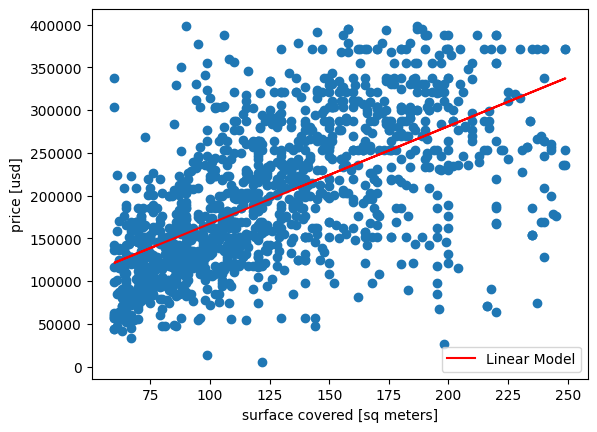

In [ ]:
# The relationship between the observations in `X_train` and the model’s predictions
plt.plot(X_train, y_pred_training, color="red", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();